In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def init_centroids(X, n_centroids):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    """
    
    # Randomly reorder the indices of examples
    n_samples = X.shape[0]
    rand_idx = np.random.permutation(n_samples)
    
    # Take the first K examples as centroids
    centroids = X[rand_idx[:n_centroids]]
    
    return centroids

In [3]:
def belongs_to_centroid(X, centroids):
    """
    Computes the centroid memberships for every example
    Returns:
        k_indices (array_like): (m,) contains a list of the indices of the closest centroid corresponding to each sample
        
    """
    
    n_centroids = centroids.shape[0]
    n_samples = X.shape[0]
    
    k_indices = np.zeros(n_samples)
    
    for i in range(n_samples):
        distances = []
        for j in range(n_centroids):
            euclidean_distance = np.sqrt(np.sum(np.square(X[i] - centroids[j])))
            distances.append(euclidean_distance)
        
        k_indices[i] = np.argmin(distances)  
    
    return k_indices

In [4]:
def update_centroids(X, k_indices, centroids):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.

    """
    n_centroids = centroids.shape[0]
    
    for i in range(n_centroids):
        samples_belong_to_a_centroid = X[k_indices==i]
        centroids[i] = np.mean(samples_belong_to_a_centroid, axis=0)  # when axis=0, the mean is computed for each column
    
    return centroids

In [5]:
def cost_function(X, k_indices, centroids):
    
    n_centroids = centroids.shape[0]

    total_distance = 0.0
    
    for i in range(n_centroids):
        samples_belong_to_a_centroid = X[k_indices==i]
        
        total_distance_each_cluster = 0.0
        for j in range(len(samples_belong_to_a_centroid)):
            euclidean_distance = np.sqrt(np.sum(np.square(samples_belong_to_a_centroid[j] - centroids[i])))
            total_distance_each_cluster += euclidean_distance**2
            
        total_distance += total_distance_each_cluster
        
    return total_distance

In [6]:
def run_kMeans(X, n_centroids, max_iters=20):
    """
    Runs the K-Means algorithm on data matrix X
    
    """
    n_samples, n_features = X.shape
    
    centroids = init_centroids(X, n_centroids)
    list_cost = []
    
    for i in range(max_iters):
        k_indices = belongs_to_centroid(X, centroids)
        
        if i == 0:  # to append the first initial centroid
            cost = cost_function(X, k_indices, centroids)
            list_cost.append(cost)
            print('Cost when Initialization = {}'.format(cost))
            print('~'*100)
            
        centroids = update_centroids(X, k_indices, centroids)
        cost = cost_function(X, k_indices, centroids)
        list_cost.append(cost)
        
        print("K-Means Iteration {}/{}".format(i+1, max_iters))
        print('Cost = {}'.format(cost))
        print('~'*100)
        
    return centroids, k_indices, list_cost

In [7]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, n_features=2, centers=6, cluster_std=6.00)
X.shape

(300, 2)

In [8]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

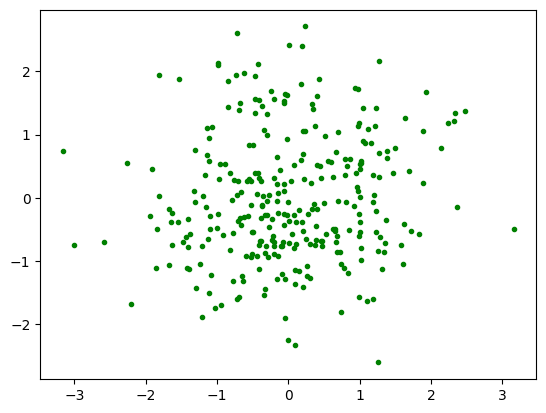

In [9]:
plt.plot(X[:, 0], X[:, 1], 'g.')

In [10]:
max_iters=20
centroids, labels, list_cost = run_kMeans(X, n_centroids=3, max_iters=max_iters)

Cost when Initialization = 658.5966987263017
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Iteration 1/20
Cost = 338.2208684449956
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Iteration 2/20
Cost = 278.6456825363858
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Iteration 3/20
Cost = 265.9964327184856
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Iteration 4/20
Cost = 262.9214030258872
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Iteration 5/20
Cost = 262.2845115418794
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Iteration 6/20
Cost = 262.1066007086383
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [11]:
cluster_1 = []
cluster_2 = []
cluster_3 = []

for i in range(len(labels)):
    if labels[i] == 0:
        cluster_1.append(X[i])
    elif labels[i] == 1:
        cluster_2.append(X[i])
    else:
        cluster_3.append(X[i])

In [12]:
cluster_1 = np.array(cluster_1)
cluster_2 = np.array(cluster_2)
cluster_3 = np.array(cluster_3)

In [13]:
cluster_1.shape, cluster_2.shape, cluster_3.shape

((93, 2), (113, 2), (94, 2))

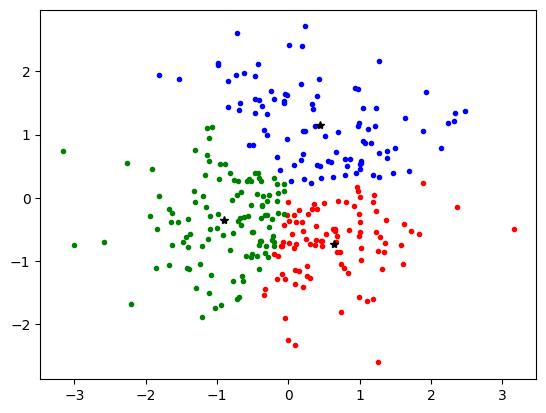

In [14]:
plt.plot(cluster_1[:, 0], cluster_1[:, 1], 'r.')
plt.plot(cluster_2[:, 0], cluster_2[:, 1], 'g.')
plt.plot(cluster_3[:, 0], cluster_3[:, 1], 'b.')
plt.plot(centroids[:, 0], centroids[:, 1], 'k*')

In [15]:
centroids

array([[ 0.63579226, -0.73556111],
       [-0.89654007, -0.35758576],
       [ 0.4487271 ,  1.15759973]])

Text(0.5, 1.0, 'Iterations and Cost')

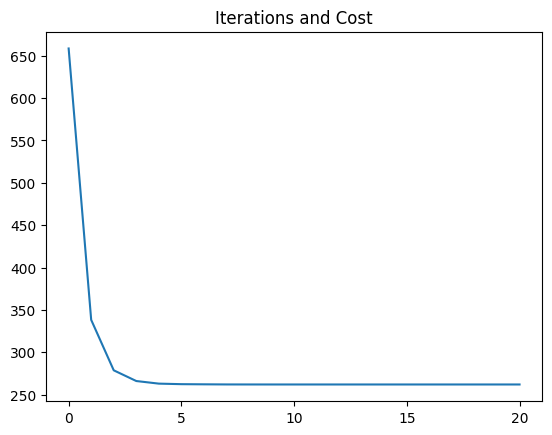

In [16]:
plt.xticks(ticks=range(0, max_iters+1, 5))
plt.plot(list_cost)
plt.title('Iterations and Cost')

# Image compression with K-means

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

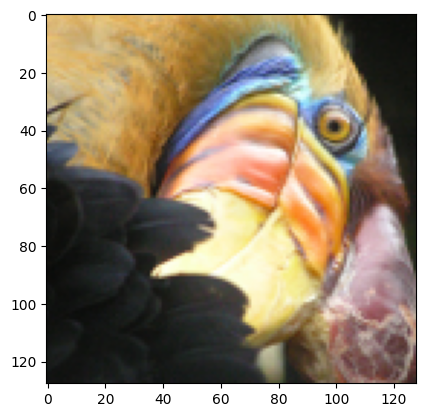

In [17]:
original_img = plt.imread('bird_small.png')
plt.imshow(original_img)

In [18]:
original_img.shape

(128, 128, 3)

To call the `run_kMeans`, you need to first transform the matrix `original_img` into a two-dimensional matrix.

*Note: If you'll try this exercise later on a JPG file, you first need to divide the pixel values by 255 so it will be in the range 0 to 1. This is not necessary for PNG files (e.g. `bird_small.png`) because it is already loaded in the required range (as mentioned in the [plt.imread() documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)). We commented a line below for this so you can just uncomment it later in case you want to try a different file.* 

In [19]:
X_train = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
X_train.shape

(16384, 3)

In [20]:
centroids, labels, list_cost = run_kMeans(X_train, n_centroids=16, max_iters=max_iters)

Cost when Initialization = 344.1890153395896
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Iteration 1/20
Cost = 236.80822830985176
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Iteration 2/20
Cost = 181.56157935723996
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Iteration 3/20
Cost = 171.34052110561157
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Iteration 4/20
Cost = 165.0263524468341
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Iteration 5/20
Cost = 160.39796360235346
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
K-Means Iteration 6/20
Cost = 156.6389987612663
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [21]:
centroids.shape, labels.shape

((16, 3), (16384,))

After finding the top $K=16$ colors to represent the image, you can now
assign each pixel position to its closest centroid using the
`belongs_to_centroid` function. 
* This allows you to represent the original image using the centroid assignments of each pixel. 
* Notice that you have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 24 bits (i.e. 8 bits x 3 channels in RGB encoding) for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [22]:
# Replace each pixel with the color of the closest centroid
labels = np.array(labels, dtype='int16')
compressed_img = centroids[labels] 
compressed_img.shape

(16384, 3)

In [24]:
# Reshape the image into the proper dimensions
compressed_img = np.reshape(compressed_img, original_img.shape)
compressed_img.shape

(128, 128, 3)

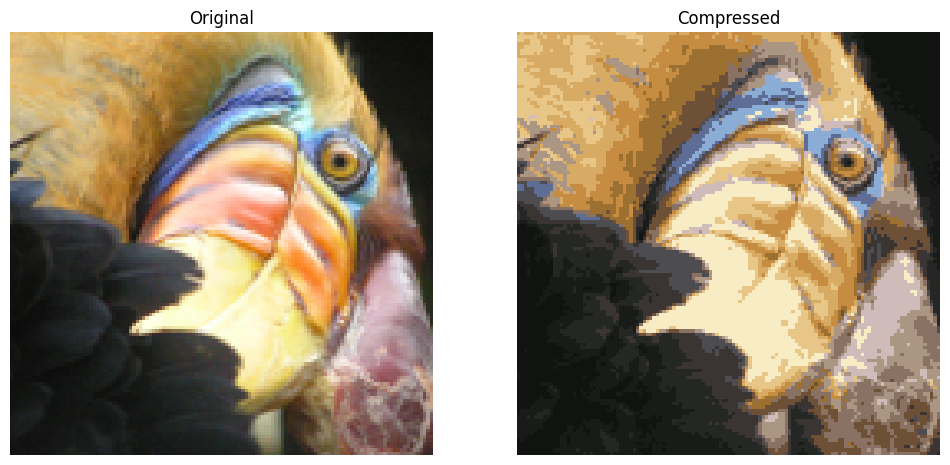

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12,12))
plt.axis('off')

# Display original image
ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

# Display compressed image
ax[1].imshow(compressed_img)
ax[1].set_title('Compressed')
ax[1].set_axis_off()

Finally, you can view the effects of the compression by reconstructing
the image based only on the centroid assignments. 
* Specifically, you replaced each pixel with the value of the centroid assigned to
it. 
* Figure 2 shows a sample reconstruction. Even though the resulting image retains most of the characteristics of the original, you will also see some compression artifacts because of the fewer colors used.